In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#Data Cleaning

In [11]:
# Drop CustomerID (not useful for clustering)
df_cleaned = df.drop("CustomerID", axis=1)

# Encode Gender column (Male = 1, Female = 0)
le = LabelEncoder()
df_cleaned["Gender"] = le.fit_transform(df_cleaned["Gender"])

# Display cleaned data
df_cleaned.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
# Scale all features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert scaled data back to DataFrame for readability
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Preview scaled data
df_scaled.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [14]:
#clustering

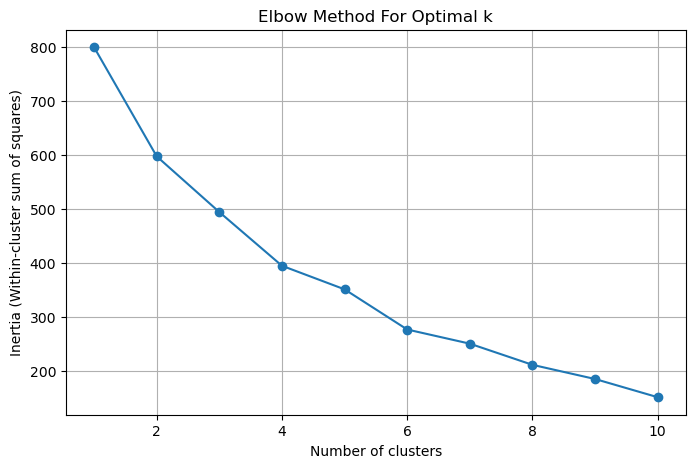

In [15]:
from sklearn.cluster import KMeans

# Elbow Method to find the optimal number of clusters
inertia = []  # Sum of squared distances for each cluster count

# Try from 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [17]:
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# View first few rows with cluster label
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


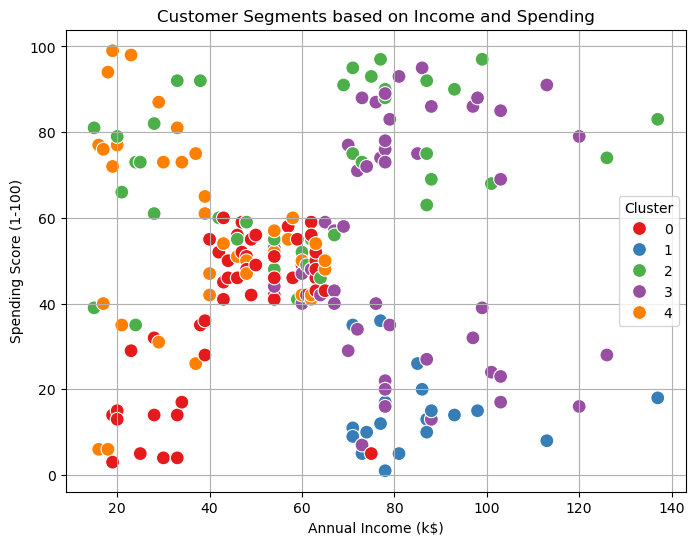

In [19]:
# Use only two features for 2D visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set1",
    s=100
)
plt.title("Customer Segments based on Income and Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


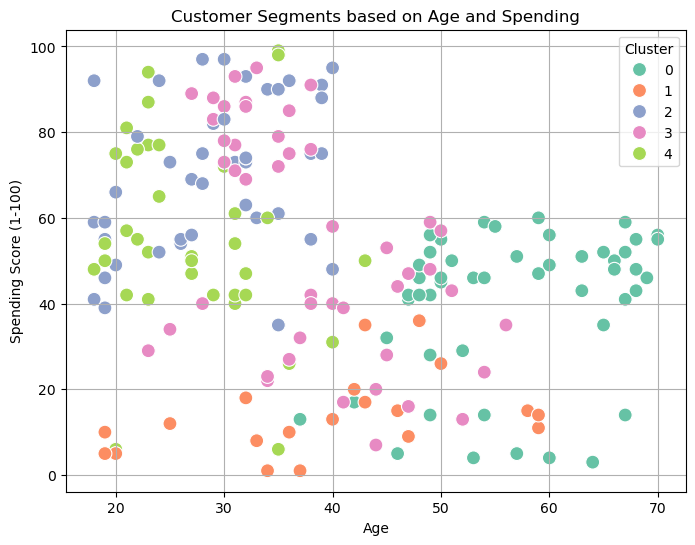

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Age"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set2",
    s=100
)
plt.title("Customer Segments based on Age and Spending")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [45]:
# Save the final DataFrame with cluster labels to CSV
df.to_csv("Customer_Segments.csv", index=False)
